In [1]:
import os
import sys

import sys
sys.path.append("..")

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from models.multiscale_vae import MultiscaleVariationalAutoencoder

import utils
import utils.transform

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

Using TensorFlow backend.


In [2]:
# run params
SECTION = "vae"
RUN_ID = "0001"
DATA_NAME = "cifar10"
BASE_DIR= "./run"
BASE_DIR_SECTION = "{0}/{1}/".format(BASE_DIR, SECTION)
RUN_FOLDER = BASE_DIR_SECTION + "_".join([RUN_ID, DATA_NAME])

if not os.path.exists(BASE_DIR):
    os.mkdir(BASE_DIR)
    
if not os.path.exists(BASE_DIR_SECTION):
    os.mkdir(BASE_DIR_SECTION)
    
if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, "viz"))
    os.mkdir(os.path.join(RUN_FOLDER, "images"))
    os.mkdir(os.path.join(RUN_FOLDER, "weights"))

mode = "build"

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

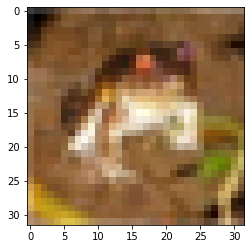

In [4]:
# Display original
plt.figure()
plt.imshow(x_train[0,:,:,:]) 
plt.show()  

In [5]:
multiscale_vae = MultiscaleVariationalAutoencoder(
    input_dims=(32,32,3), 
    levels=3, 
    z_dims=[64, 128, 256])

In [6]:
LEARNING_RATE = 0.001
R_LOSS_FACTOR = 1000
KL_LOSS_FACTOR = 10

In [7]:
multiscale_vae.compile(
    learning_rate=LEARNING_RATE, 
    r_loss_factor=R_LOSS_FACTOR,
    kl_loss_factor=KL_LOSS_FACTOR
)

In [8]:
EPOCHS = 10
BATCH_SIZE = 32
PRINT_EVERY_N_BATCHES = 1000
INITIAL_EPOCH = 0

In [9]:
# serialize model to JSON
model_json = multiscale_vae.model_predict.to_json()
with open("model_predict.json", "w") as json_file:
    json_file.write(model_json)

In [10]:
multiscale_vae.train(     
    x_train, 
    batch_size = BATCH_SIZE, 
    epochs = EPOCHS, 
    run_folder = RUN_FOLDER, 
    print_every_n_batches = PRINT_EVERY_N_BATCHES, 
    initial_epoch = INITIAL_EPOCH,
    step_size=5,
    lr_decay=0.5
)

Epoch 1/10
  128/50000 [..............................] - ETA: 1:17:15 - loss: 376.0234 - activation_1_loss: 21.2096 - activation_2_loss: 69.8508 - activation_3_loss: 284.9631 - activation_1_vae_r_loss: 21.2096 - activation_2_vae_r_loss: 69.8508 - activation_3_vae_r_loss: 284.9631

/home/arxwn/.conda/envs/monochain/lib/python3.7/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.448114). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 142s 3ms/step - loss: 140.5542 - activation_1_loss: 11.6142 - activation_2_loss: 37.3242 - activation_3_loss: 91.6159 - activation_1_vae_r_loss: 11.6142 - activation_2_vae_r_loss: 37.3242 - activation_3_vae_r_loss: 91.6159

Epoch 00001: saving model to ./run/vae/0001_cifar10/weights/weights-001-140.55.h5

Epoch 00001: saving model to ./run/vae/0001_cifar10/weights/weights.h5
Epoch 2/10
50000/50000 [==============================] - 130s 3ms/step - loss: 107.5610 - activation_1_loss: 9.2600 - activation_2_loss: 29.3601 - activation_3_loss: 68.9409 - activation_1_vae_r_loss: 9.2600 - activation_2_vae_r_loss: 29.3601 - activation_3_vae_r_loss: 68.9409

Epoch 00002: saving model to ./run/vae/0001_cifar10/weights/weights-002-107.56.h5

Epoch 00002: saving model to ./run/vae/0001_cifar10/weights/weights.h5
Epoch 3/10
50000/50000 [==============================] - 130s 3ms/step - loss: 99.3788 - activation_1_loss: 8.4646 - activation_2_loss: 27.2

In [13]:
results = multiscale_vae.model_predict.predict(x_train[0:10,:,:,:])

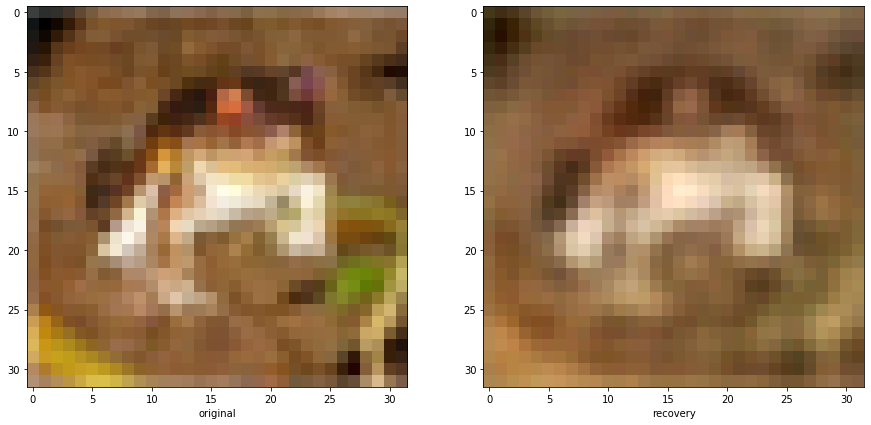

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(15,15))
plt.subplot(1,2,1)
plt.xlabel("original")
plt.imshow(x_train[0,:,:,:])
plt.subplot(1,2,2)
plt.imshow(results[0,:,:,:])
plt.xlabel("recovery")
plt.show() 

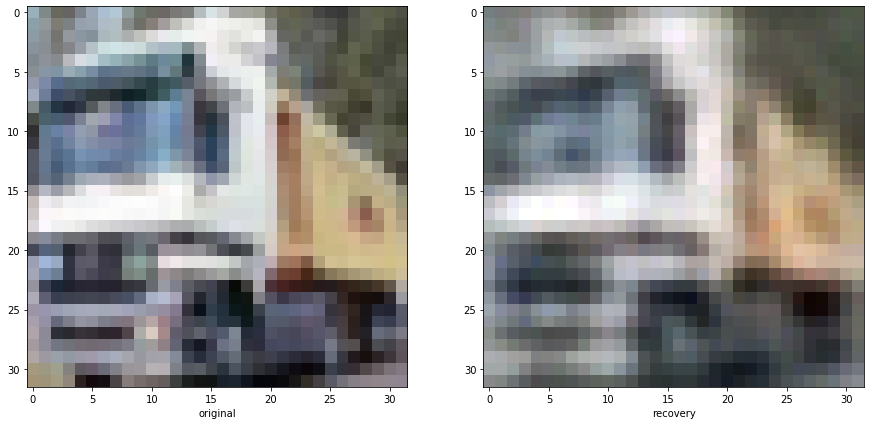

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(15,15))
plt.subplot(1,2,1)
plt.xlabel("original")
plt.imshow(x_train[1,:,:,:])
plt.subplot(1,2,2)
plt.imshow(results[1,:,:,:])
plt.xlabel("recovery")
plt.show() 

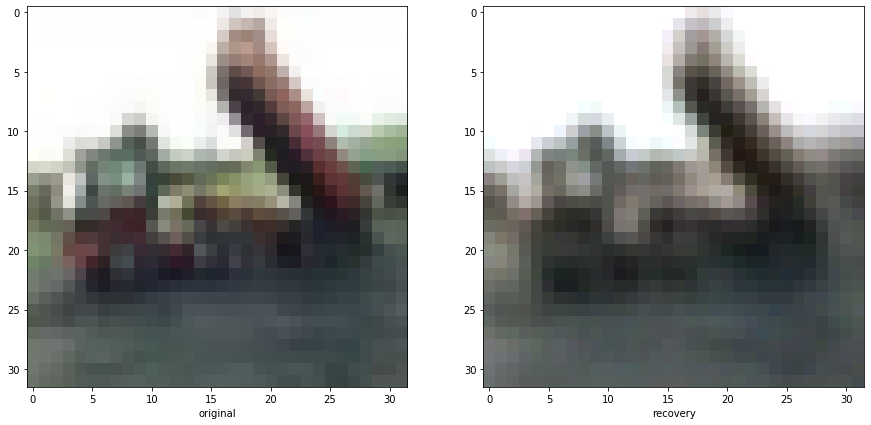

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15,15))
plt.subplot(1,2,1)
plt.xlabel("original")
plt.imshow(x_train[2,:,:,:])
plt.subplot(1,2,2)
plt.imshow(results[2,:,:,:])
plt.xlabel("recovery")
plt.show() 